# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# EDA

## Data collection & data understanding

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
original = pd.read_csv('credit_risk_dataset.csv')
train.head()  # train.sample()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [ ]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**id** column seems unnecessary so let's take one more look before dropping it

In [ ]:
train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [ ]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)
test.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,27.566781,6.406046e+04,4.687068,9251.466188,10.661216,0.159573,5.830707
std,6.032761,3.795583e+04,3.868395,5576.254680,3.020220,0.091633,4.072157
min,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,30.000000,7.588500e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,94.000000,1.900000e+06,42.000000,35000.000000,22.110000,0.730000,30.000000


In [ ]:
train.describe(include=['O'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,58645,58645,58645,58645
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,30594,12271,20984,49943


Combining train & original dataframe rows into **tando**

In [ ]:
tando = pd.concat([train, original]).reset_index(drop=True)
tando.shape

(91226, 12)

## Data cleaning

### Handling Missing Values

**original.info()** showed that tando has missing values

In [ ]:
def missing_values_report(df):
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_report = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
    return missing_report

def detailed_missing_report(df):
    missing_data = df.isnull().sum(axis=1)
    missing_report = pd.DataFrame({'Missing Cells': missing_data, 'Percentage': (missing_data / df.shape[1]) * 100})
    return missing_report.sort_values(by='Missing Cells', ascending=False)

missing_values_report(tando)

,Missing Values,Percentage
person_age,0,0.000000
person_income,0,0.000000
person_home_ownership,0,0.000000
person_emp_length,895,0.981080
loan_intent,0,0.000000
loan_grade,0,0.000000
loan_amnt,0,0.000000
loan_int_rate,3116,3.415693
loan_percent_income,0,0.000000
cb_person_default_on_file,0,0.000000


In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Using pandas fillna method
tando['person_emp_length'].fillna(tando['person_emp_length'].mean(), inplace=True)
tando['loan_int_rate'].fillna(tando['loan_int_rate'].mean(), inplace=True)

missing_values_report(tando)

,Missing Values,Percentage
person_age,0,0.0
person_income,0,0.0
person_home_ownership,0,0.0
person_emp_length,0,0.0
loan_intent,0,0.0
loan_grade,0,0.0
loan_amnt,0,0.0
loan_int_rate,0,0.0
loan_percent_income,0,0.0
cb_person_default_on_file,0,0.0


### Removing duplicates

In [ ]:
print('Number of duplicates in train: ', train.duplicated().sum())
train.drop_duplicates(inplace=True)
train.reset_index(drop=True, inplace=True)

print('Number of duplicates in tando: ', tando.duplicated().sum())
tando.drop_duplicates(inplace=True)
tando.reset_index(drop=True, inplace=True)

train.shape, tando.shape

Number of duplicates in train:  0
Number of duplicates in tando:  165


((58645, 12), (91061, 12))

### Data Type Conversion

In [ ]:
categorical_columns = train.select_dtypes(include=['O']).columns.to_list()
train[categorical_columns] = train[categorical_columns].astype('category')
tando[categorical_columns] = tando[categorical_columns].astype('category')

### Feature Screening

In [ ]:
numerical_columns = train.select_dtypes(exclude=['category']).columns.to_list()
numerical_columns.remove('loan_status')

def feature_screen(df):
    label = df['loan_status']
    features = df.drop(columns=['loan_status'])

    # Calculate Coefficient of Variation for continuous variables
    cv = features[numerical_columns].std() / features[numerical_columns].mean()

    # Identify features with CV less than 0.1
    low_cv_features = cv[cv < 0.1].index.tolist()
    print("\nFeatures with Coefficient of Variation less than 0.1:", low_cv_features)

    # Calculate Mode Category Percentage for categorical variables
    mode_percentage = features[categorical_columns].apply(lambda x: x.value_counts(normalize=True).max())

    # Identify features where the mode category percentage is greater than 95%
    high_mode_features = mode_percentage[mode_percentage > 95].index.tolist()
    print("Categorical features where mode category percentage is greater than 95%:", high_mode_features)

    # Calculate Percentage of Unique Categories for categorical variables
    unique_category_percentage = features[categorical_columns].nunique() / len(features) * 100

    # Identify features with a percentage of unique categories exceeding 90%(id column would've been one)
    high_unique_features = unique_category_percentage[unique_category_percentage > 90].index.tolist()
    print("Categorical features with percentage of unique categories exceeding 90%:", high_unique_features)

    # Combine all features to be removed
    features_to_remove = set(low_cv_features + high_mode_features + high_unique_features)
    print("Features to be removed:", features_to_remove)

    # Remove the identified features from the features dataframe
    cleaned_features = features.drop(columns=features_to_remove)

    # Return the cleaned features with the label
    return pd.concat([cleaned_features, label], axis=1)

print('Feature screening for train dataframe')
cleaned_train = feature_screen(train)
print('cleaned_train shape: ', cleaned_train.shape)

print('\n\nFeature screening for tando dataframe')
cleaned_tando = feature_screen(tando)
print('cleaned_tando shape: ', cleaned_tando.shape)


categorical_columns = cleaned_train.select_dtypes(include=['category']).columns.to_list()
numerical_columns = cleaned_train.select_dtypes(exclude=['category']).columns.to_list()
numerical_columns.remove('loan_status')

cleaned_test = test[categorical_columns+numerical_columns]

Feature screening for train dataframe

Features with Coefficient of Variation less than 0.1: []
Categorical features where mode category percentage is greater than 95%: []
Categorical features with percentage of unique categories exceeding 90%: []
Features to be removed: set()
cleaned_train shape:  (58645, 12)


Feature screening for tando dataframe

Features with Coefficient of Variation less than 0.1: []
Categorical features where mode category percentage is greater than 95%: []
Categorical features with percentage of unique categories exceeding 90%: []
Features to be removed: set()
cleaned_tando shape:  (91061, 12)


### Handling Out of Logical Range Data

For example there is a client **123 years old**, which is I think out of logical range.

In [ ]:
cleaned_train = cleaned_train[(cleaned_train.person_age < 100) & (cleaned_train.person_emp_length < 70)]
cleaned_train.reset_index(drop=True, inplace=True)

cleaned_tando = cleaned_tando[(cleaned_tando.person_age < 100) & (cleaned_tando.person_emp_length < 70)]
cleaned_tando.reset_index(drop=True, inplace=True)

cleaned_train.shape, cleaned_tando.shape

((58642, 12), (91051, 12))

### Handling Inconsistent Data
Searching for wrongly typed categories for example if there are both **'Education'** and **'education'** categories in loan_intent then we make them one category.

In [ ]:
cleaned_train['loan_status'].value_counts(normalize=True)*100, \
cleaned_tando['loan_status'].value_counts(normalize=True)*100

(loan_status
 0    85.762764
 1    14.237236
 Name: proportion, dtype: float64,
 loan_status
 0    83.045766
 1    16.954234
 Name: proportion, dtype: float64)

In [ ]:
for col in categorical_columns:
    print('\ncleaned_train')
    print(cleaned_train[col].value_counts())
    print('\ncleaned_tando')
    print(cleaned_tando[col].value_counts())


cleaned_train
person_home_ownership
RENT        30594
MORTGAGE    24821
OWN          3138
OTHER          89
Name: count, dtype: int64

cleaned_tando
person_home_ownership
RENT        46968
MORTGAGE    38187
OWN          5701
OTHER         195
Name: count, dtype: int64

cleaned_train
loan_intent
EDUCATION            12271
MEDICAL              10933
PERSONAL             10015
VENTURE              10010
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

cleaned_tando
loan_intent
EDUCATION            18680
MEDICAL              16975
VENTURE              15689
PERSONAL             15511
DEBTCONSOLIDATION    14322
HOMEIMPROVEMENT       9874
Name: count, dtype: int64

cleaned_train
loan_grade
A    20984
B    20398
C    11036
D     5033
E     1009
F      149
G       33
Name: count, dtype: int64

cleaned_tando
loan_grade
A    31686
B    30782
C    17472
D     8652
E     1972
F      390
G       97
Name: count, dtype: int64

cleaned_train
cb_person_default_on_file
N

## Outlier Detection and Handling

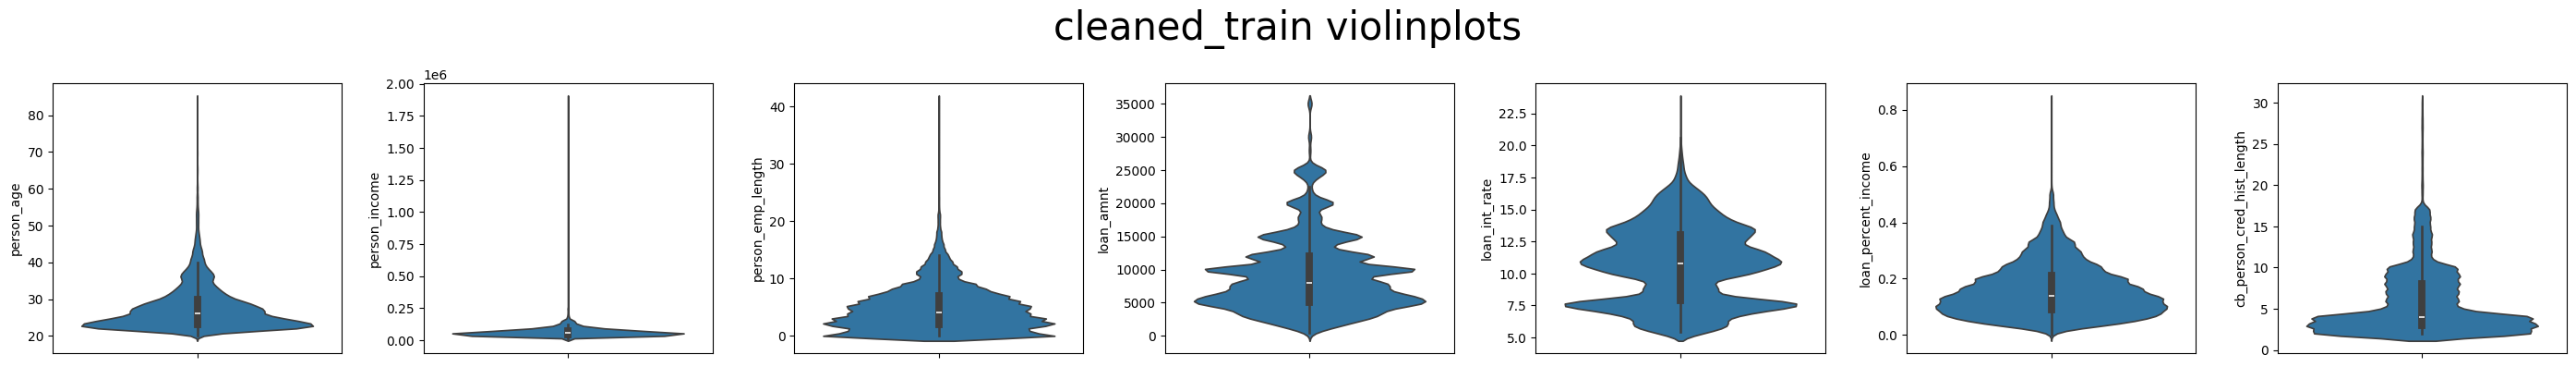

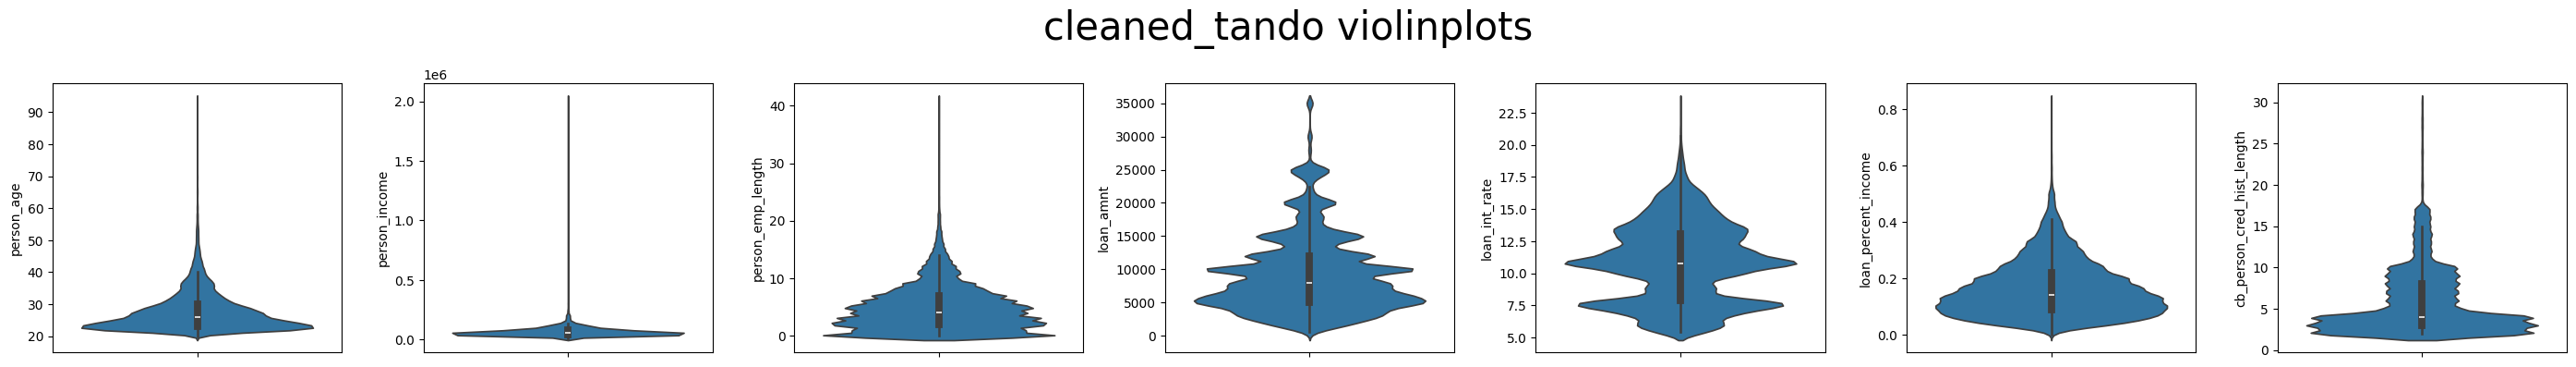

In [ ]:
def violin_plot(df, columns, name=''):
    m = len(columns)
    fig, axes = plt.subplots(1, m, figsize=(m*4, 4))
    plt.suptitle(f'{name} violinplots', size=30)
    for i, col in enumerate(columns):
        sns.violinplot(data=df, y=col, ax=axes[i])
    plt.tight_layout()

violin_plot(cleaned_train, numerical_columns, 'cleaned_train')
violin_plot(cleaned_tando, numerical_columns, 'cleaned_tando')
# tap twice(in jupiter) or once(in colab) to zoom

### Applying One-Dimensional Methods

One-dimensional methods can be applied only to continuous variables. We will explore two common methods:

1. **Standard Deviation Method**: This method uses the standard deviation from the mean to identify outliers. Values that fall outside of 3 standard deviations are typically considered outliers.
2. **Interquartile Range (IQR) Method**: This method uses the IQR to define limits on the sample values. Values below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR are considered outliers.

#### Detecting outliers

In [ ]:
def detect_outliers_std(df, columns, threshold=3):
    outliers_dict = {}
    for col in columns:
        mean = df[col].mean()
        std_dev = df[col].std()
        outliers = (df[col] > mean + threshold * std_dev) | (df[col] < mean - threshold * std_dev)
        outliers_dict[col] = df[outliers].index
    return outliers_dict

def detect_outliers_iqr(df, columns, k=2):
    outliers_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[col] < (Q1 - k * IQR)) | (df[col] > (Q3 + k * IQR))
        outliers_dict[col] = df[outliers].index
    return outliers_dict

std_outliers_train = detect_outliers_std(cleaned_train, numerical_columns, threshold=3)
iqr_outliers_train = detect_outliers_iqr(cleaned_train, numerical_columns, k=2)

std_outliers_tando = detect_outliers_std(cleaned_tando, numerical_columns, threshold=3)
iqr_outliers_tando = detect_outliers_iqr(cleaned_tando, numerical_columns, k=2)

tab = pd.DataFrame(columns=numerical_columns, index=['std_outliers_train', 'iqr_outliers_train', 'std_outliers_tando', 'iqr_outliers_tando'])

for col in numerical_columns:
    tab.loc['std_outliers_train', col] = len(std_outliers_train[col])
    tab.loc['iqr_outliers_train', col] = len(iqr_outliers_train[col])
    tab.loc['std_outliers_tando', col] = len(std_outliers_tando[col])
    tab.loc['iqr_outliers_tando', col] = len(iqr_outliers_tando[col])

tab['total'] = tab.sum(1)
display(tab)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,total
std_outliers_train,1009,532,625,345,66,459,492,3528
iqr_outliers_train,1172,1421,457,343,1,368,468,4230
std_outliers_tando,1655,912,1072,763,123,872,775,6172
iqr_outliers_tando,1926,1918,776,769,0,511,732,6632


#### Handling Outliers

##### Remove Rows Example

In [ ]:
train_removed = cleaned_train.copy()
tando_removed = cleaned_tando.copy()

for col in numerical_columns:
    train_removed = train_removed[~train_removed.index.isin(iqr_outliers_train[col])]
    tando_removed = tando_removed[~tando_removed.index.isin(iqr_outliers_tando[col])]

print("train_removed data shape after removing outliers using IQR method: ", train_removed.shape)
print("tando_removed data shape after removing outliers using IQR method: ", tando_removed.shape)

train_removed data shape after removing outliers using IQR method:  (55153, 12)
tando_removed data shape after removing outliers using IQR method:  (85645, 12)


##### Coerce to Bounds Example

In [ ]:
train_coerced = cleaned_train.copy()
tando_coerced = cleaned_tando.copy()

for col in numerical_columns:
    Q1 = train_coerced[col].quantile(0.25)
    Q3 = train_coerced[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_coerced[col] = np.where(train_coerced[col] < lower_bound, lower_bound, train_coerced[col])
    train_coerced[col] = np.where(train_coerced[col] > upper_bound, upper_bound, train_coerced[col])

    Q1 = tando_coerced[col].quantile(0.25)
    Q3 = tando_coerced[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    tando_coerced[col] = np.where(tando_coerced[col] < lower_bound, lower_bound, tando_coerced[col])
    tando_coerced[col] = np.where(tando_coerced[col] > upper_bound, upper_bound, tando_coerced[col])

print("train_coerced data shape after coercing outliers using IQR method: ", train_coerced.shape)
print("tando_coerced data shape after coercing outliers using IQR method: ", tando_coerced.shape)

train_coerced data shape after coercing outliers using IQR method:  (58642, 12)
tando_coerced data shape after coercing outliers using IQR method:  (91051, 12)


#### Violinplots

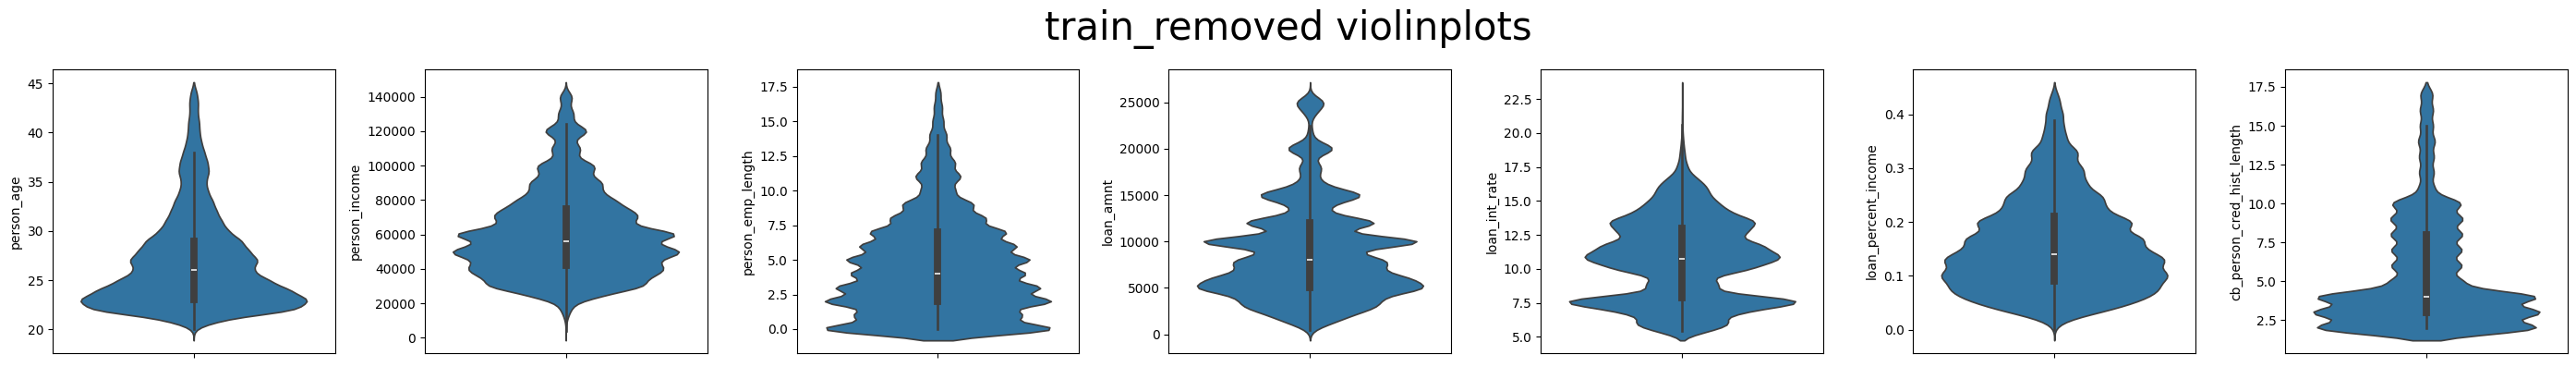

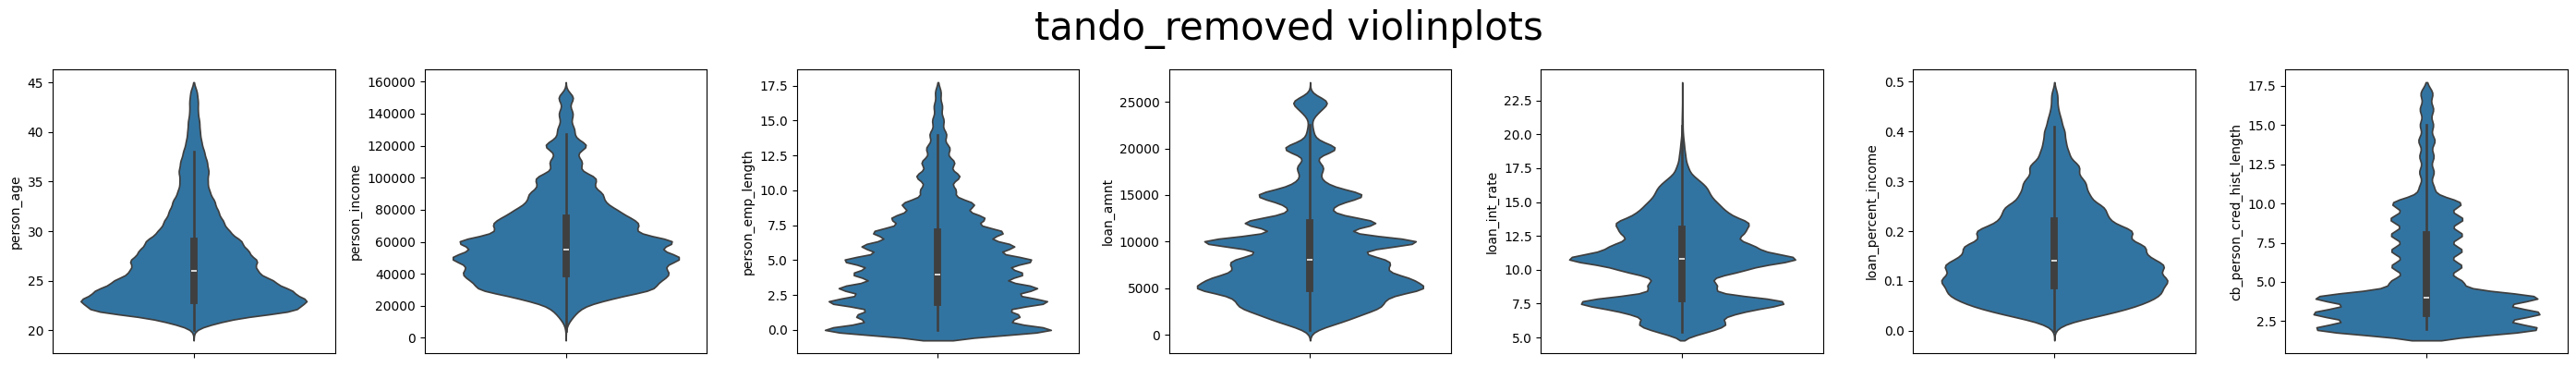

In [ ]:
violin_plot(train_removed, numerical_columns, 'train_removed')
violin_plot(tando_removed, numerical_columns, 'tando_removed')

### Applying Multidimensional Method

Outlier detection can also be extended to multidimensional datasets where interactions between multiple variables can reveal anomalies that one-dimensional methods might miss. One effective multidimensional method is the **Isolation Forest algorithm**.

Before applying **the Isolation Forest** for outlier detection, we need to preprocess the data.  
This includes:
- 1. **Imputation**: Missing values can lead to errors in model training and predictions. Imputing missing values ensures that our dataset is complete.
- 2. **Encoding**: Machine learning algorithms require numerical inputs. Encoding categorical variables allows us to convert them into a numerical format that can be processed by the model.
- 3. **Scaling**: Standardizing numerical features by removing the mean and scaling to unit variance is important for algorithms like Isolation Forest, which are sensitive to the scale of input data.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the preprocessing pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Define the preprocessing pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Combine numerical and categorical pipelines into a single preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])

# Apply the preprocessing pipeline to the combined data
train_preprocessed = preprocessor.fit_transform(cleaned_train)
tando_preprocessed = preprocessor.fit_transform(cleaned_tando)

After preprocessing, we apply **the Isolation Forest** algorithm to detect and remove outliers from the dataset. Isolation Forest is an unsupervised learning algorithm that identifies anomalies in the data by isolating observations. Anomalies are more **susceptible to isolation**, thus making them easier to identify. We set the **contamination parameter to 0.05**, which means we expect 5% of the data to be outliers.

In [ ]:
# Detecting Outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)

iso_forest.fit(train_preprocessed)
outliers_train = iso_forest.predict(train_preprocessed) == -1
print(f"Isolation Forest detected {np.sum(outliers_train)} outliers in cleaned_train.")

iso_forest.fit(tando_preprocessed)
outliers_tando = iso_forest.predict(tando_preprocessed) == -1
print(f"Isolation Forest detected {np.sum(outliers_tando)} outliers in cleaned_tando.")

# Handling Outliers

# Remove outliers
train_iso = cleaned_train[~outliers_train]
tando_iso = cleaned_tando[~outliers_tando]

print("train_iso data shape after removing outliers using Isolation Forest: ", train_iso.shape)
print("tando_iso data shape after removing outliers using Isolation Forest: ", tando_iso.shape)

Isolation Forest detected 2933 outliers in cleaned_train.
Isolation Forest detected 4553 outliers in cleaned_tando.
train_iso data shape after removing outliers using Isolation Forest:  (55709, 12)
tando_iso data shape after removing outliers using Isolation Forest:  (86498, 12)


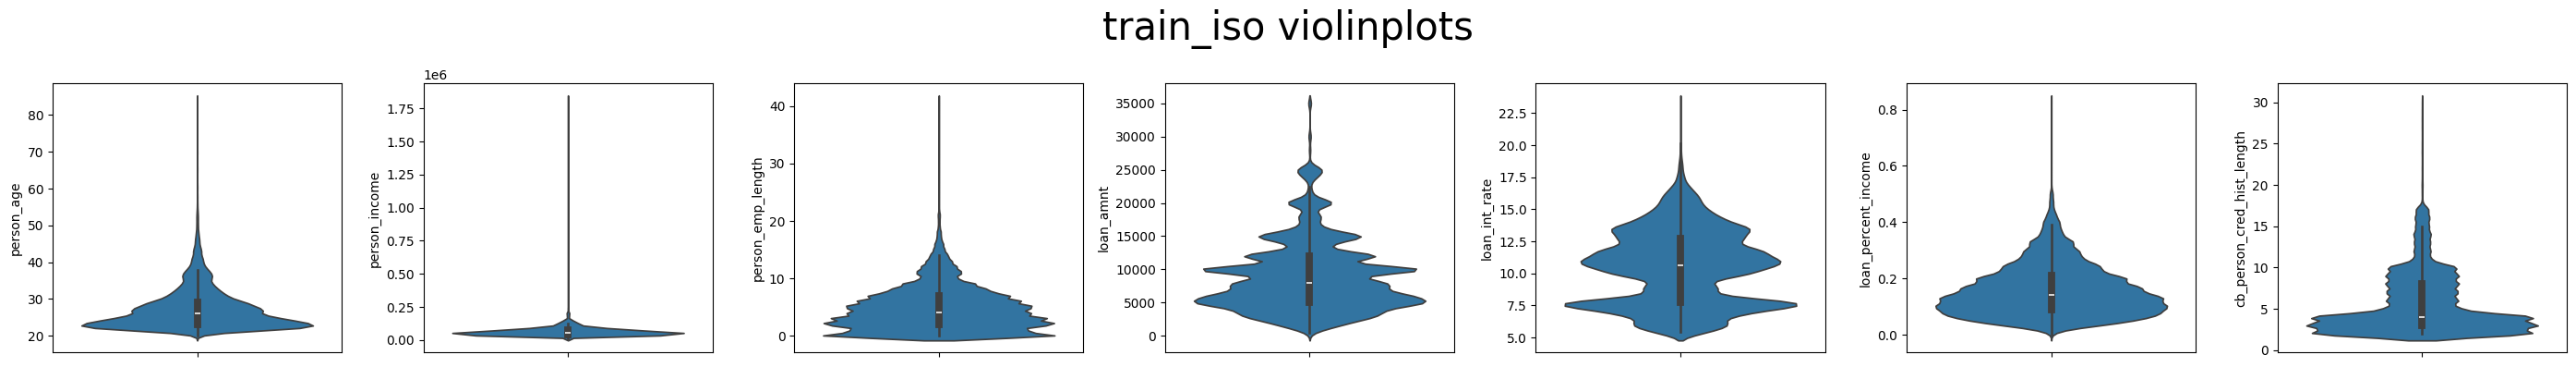

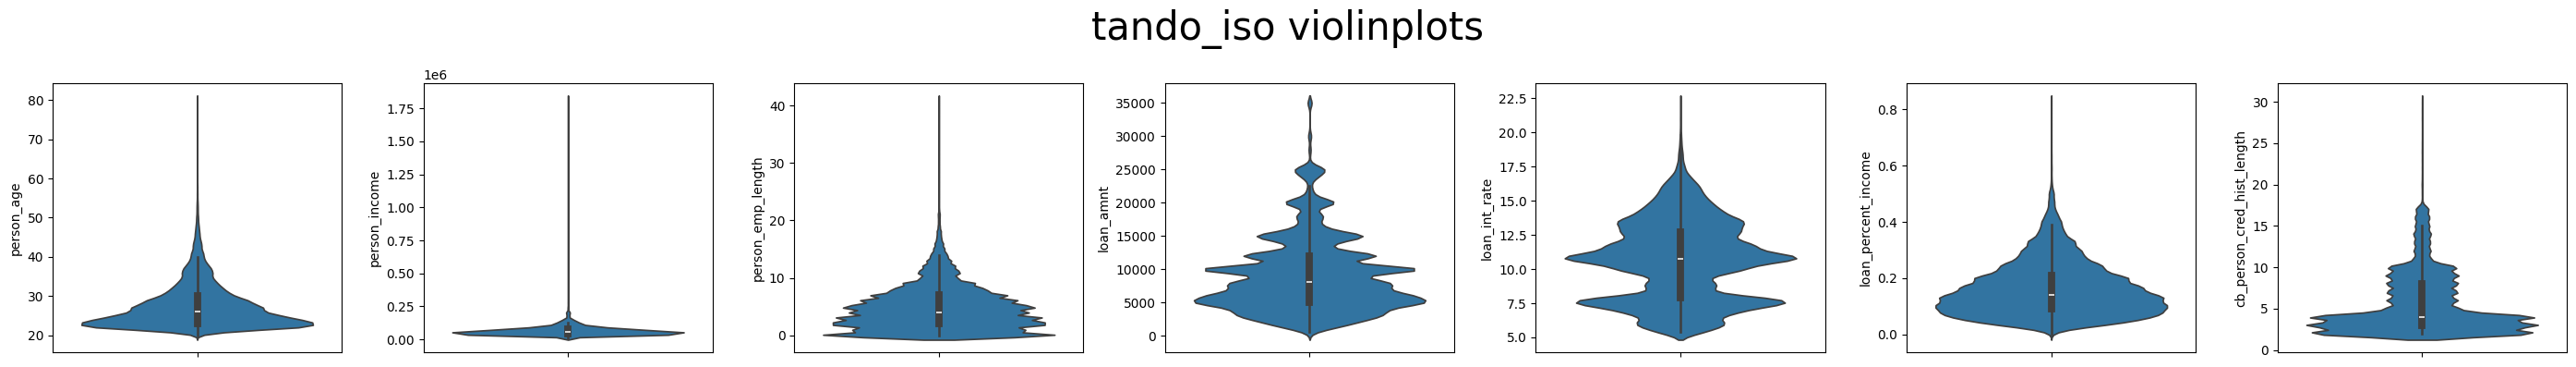

In [ ]:
violin_plot(train_iso, numerical_columns, 'train_iso')
violin_plot(tando_iso, numerical_columns, 'tando_iso')

## Data Visualisation

### Autoviz

In [2]:
# !pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV_infinty = AutoViz_Class()

AV_infinty .AutoViz(filename='',dfte=train_removed,depVar='loan_status',verbose=1,max_rows_analyzed=train_removed.shape[0]
               ,max_cols_analyzed=train_removed.shape[1])

### Profile report

In [3]:
# !pip install ydata_profiling
from ydata_profiling import ProfileReport

train_removed['loan_status'] = train_removed['loan_status'].astype('category')
# We did this to ensure that the data types are correctly identified by the profiling tool. you can also use the type_schema parameter to specify the data types of the columns.

train_0 = train_removed[train_removed.loan_status == 0].copy()
train_1 = train_removed[train_removed.loan_status == 1].copy()

# Generate the profile report for Loan_status = 0 with adjusted correlation settings
profile_0 = ProfileReport(train_0, title="Loan_status = 0", explorative=True, correlations={"auto": {"calculate": False}})

# Generate the profile report for Loan_status = 1 with adjusted correlation settings
profile_1 = ProfileReport(train_1, title="Loan_status = 1", explorative=True, correlations={"auto": {"calculate": False}})

comparison_report = profile_0.compare(profile_1)

# Save the comparison report to an HTML file
comparison_report.to_file("comparison_report_loan_status.html")

# Display the comparison report within the notebook
comparison_report.to_notebook_iframe()

train_removed['loan_status'] = train_removed['loan_status'].cat.codes

### Average Loan Amount by Loan Grade and Status

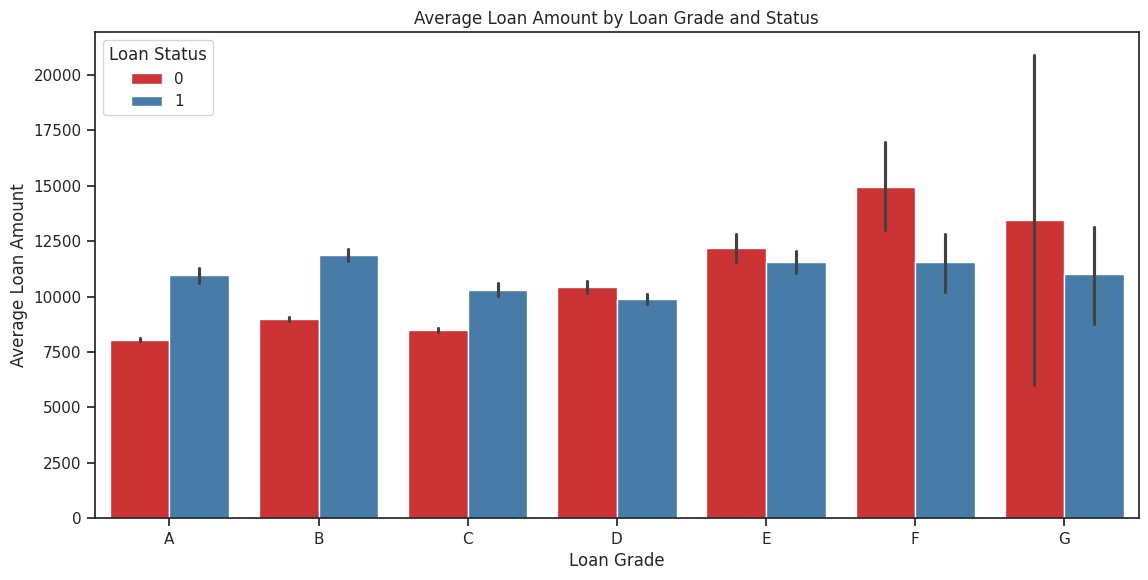

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=train_removed, estimator=np.mean)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()

### Pairplots

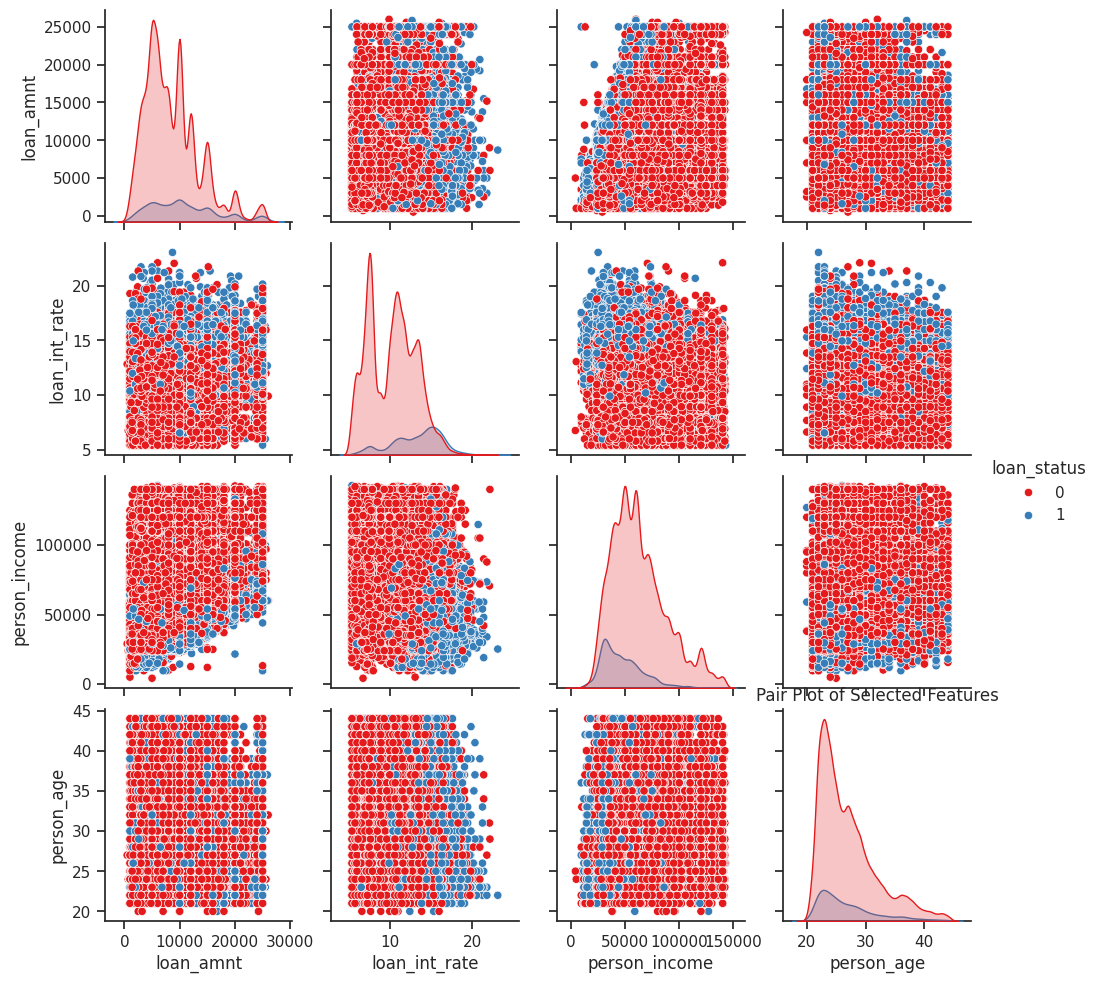

In [ ]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'person_age', 'loan_status']
sns.pairplot(train_removed[subset_features], hue='loan_status')
plt.title('Pair Plot of Selected Features')
plt.show()

### Stacked barplots of categorical vs target features with Chi-Square statistic and Cramer's V score


Degrees of Freedom: 3
Chi-Square Statistic: 2968.8105
p-value: 0.0000
Cramer's v: 0.23200998063625408


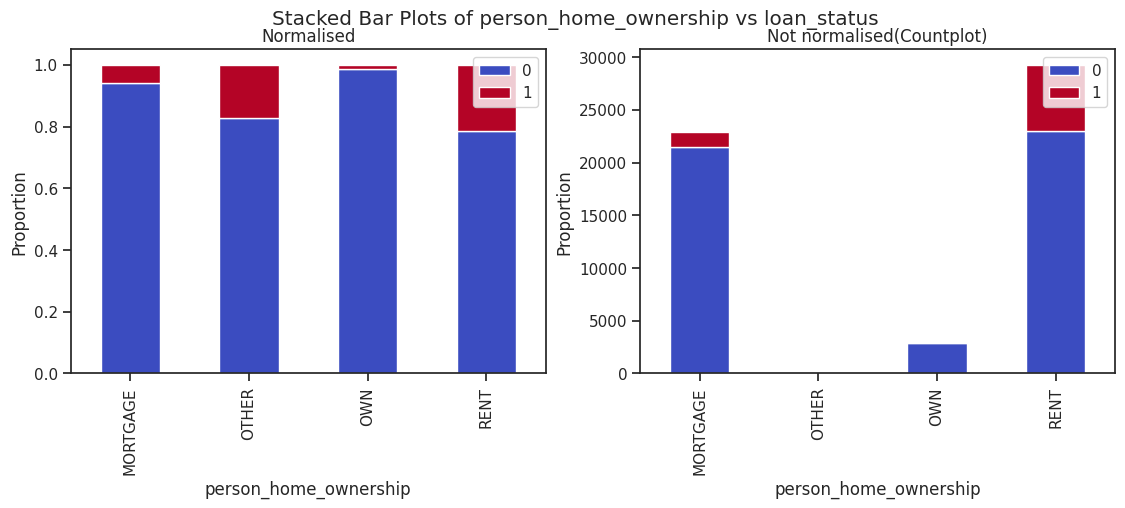


Degrees of Freedom: 5
Chi-Square Statistic: 646.5107
p-value: 0.0000
Cramer's v: 0.10826879033548552


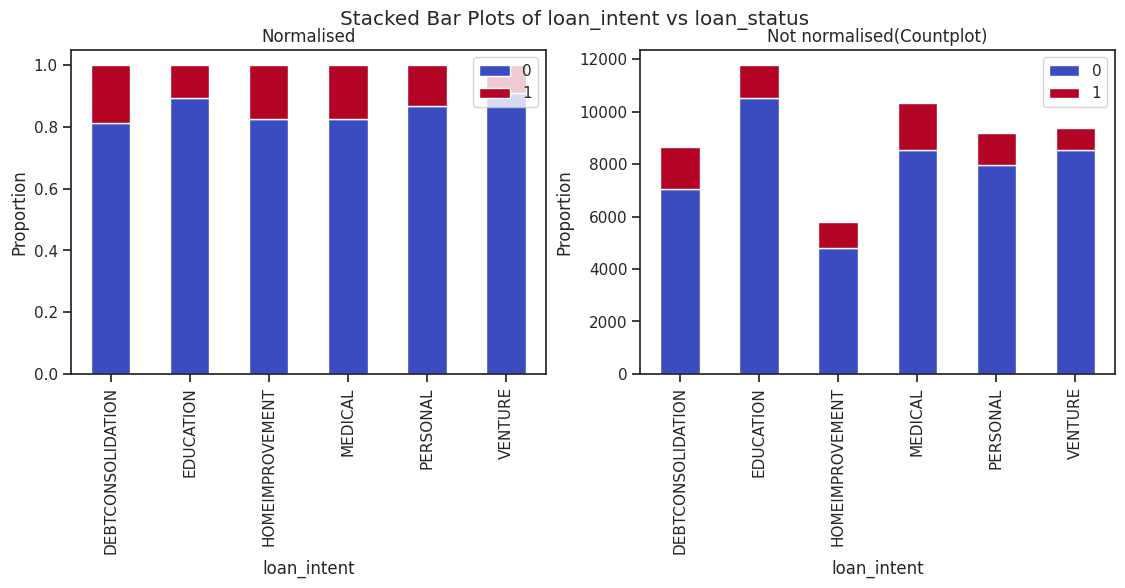


Degrees of Freedom: 6
Chi-Square Statistic: 12171.8361
p-value: 0.0000
Cramer's v: 0.4697788692698457


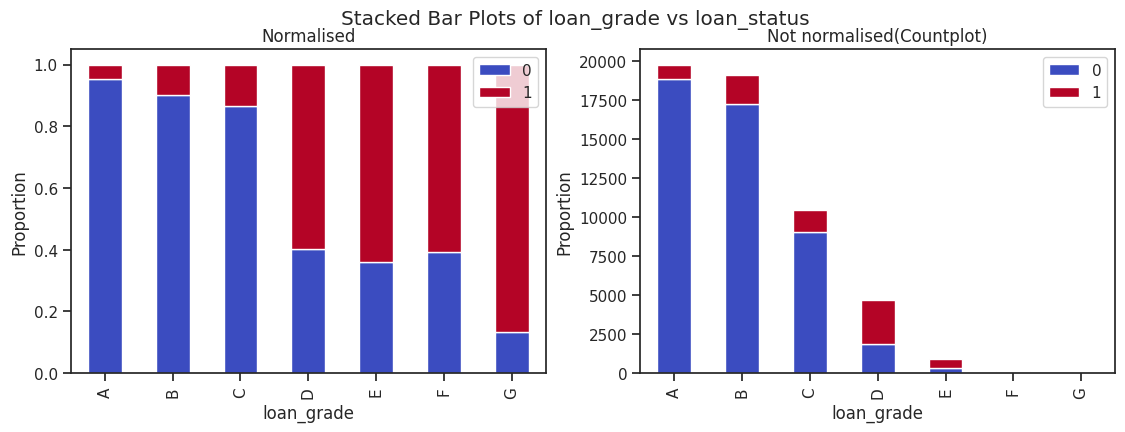


Degrees of Freedom: 1
Chi-Square Statistic: 2006.1692
p-value: 0.0000
Cramer's v: 0.1907213032252367


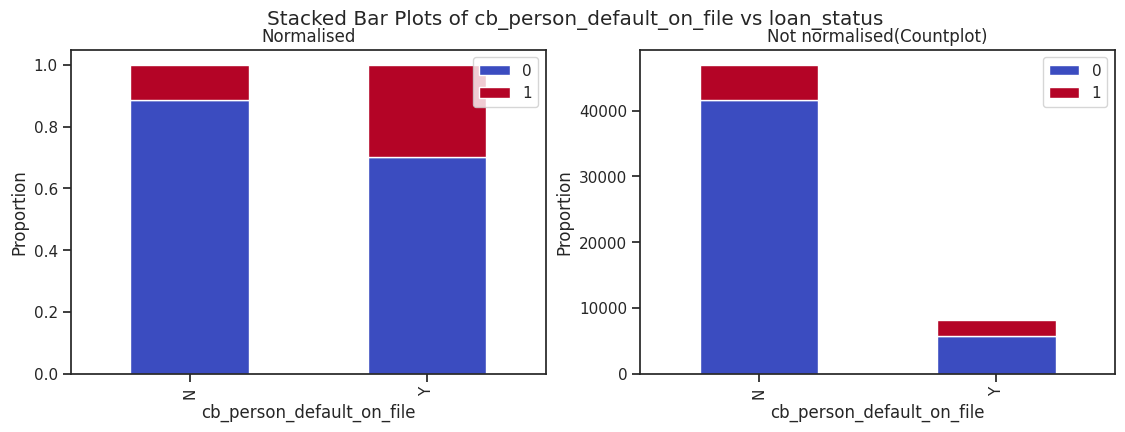

In [ ]:
import scipy.stats as stats

def stacked_bar_plot(df, feature, ax, target='loan_status', normalize=False):
    crosstab = pd.crosstab(df[feature], df[target], normalize=normalize)
    crosstab.plot(kind='bar', stacked=True, ax=ax, cmap='coolwarm')
    plt.suptitle(f'Stacked Bar Plots of {feature} vs {target}')
    if normalize=='index':
        title = 'Normalised'
    else:
        chi2, p, dof, expected_frequencies  = stats.chi2_contingency(crosstab)
        n = crosstab.sum().sum()  # Total number of observations
        c_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
        print(f"\nDegrees of Freedom: {dof}")
        print(f"Chi-Square Statistic: {chi2:.4f}")
        print(f"p-value: {p:.4f}")
        print(f"Cramer's v: {c_v}")
        title = 'Not normalised(Countplot)'
    ax.set_title(title)
    ax.set_ylabel('Proportion')
    ax.legend(loc='upper right')



for i, col in enumerate(categorical_columns):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    stacked_bar_plot(train_removed, col, axes[0], normalize='index')
    stacked_bar_plot(train_removed, col, axes[1],)
    plt.show()

## Correlation analysis

### Cramér's V

**Cramér's V** is a statistic that measures the strength of association between **two categorical variables**. It is based on the **Chi-Square statistic** and provides a value **between 0 and 1** to indicate how strongly two categorical variables are related.  

**Interpretation of Cramér's V:**
- **0**: Indicates **no association** between the variables. This means the two variables are completely independent.
- **1**: Indicates a **perfect association** between the variables. This means knowing the value of one variable allows you to predict the value of the other perfectly.
- **Values closer to 0**: Weak association.
- **Values closer to 1**: Strong association.  

**When to Use Cramér's V:**
- **Categorical vs Categorical**: Cramér's V is used when both variables are categorical, and you want to understand the strength of the relationship between them.
- **Nominal Data**: It is particularly useful for nominal (unordered) data, such as the relationship between a person's gender and their favorite color.

In [ ]:
import scipy.stats as stats
from IPython.display import display, Markdown
from itertools import combinations

def cramers_v(mat):
    chi2, p, dof, expected = stats.chi2_contingency(mat)
    n = mat.sum().sum()  # Total number of observations
    c_v = np.sqrt(chi2 / (n * (min(mat.shape) - 1)))
    if (expected<5).any():
        return (expected-5).min(), chi2, p, dof, c_v
    return chi2, p, dof, c_v

In [ ]:
for col1, col2 in combinations(categorical_columns, 2):
    display(Markdown(f"\nTest Results for **{col1}** & **{col2}**:"))
    crosstab = pd.crosstab(train_removed[col1], train_removed[col2])
    res = cramers_v(crosstab)
    if res[0] < 0:
        error, chi2, p, dof, v = res
        print(f'There was expected frequency equal to {error+5}(less than 5)')
    else:
        chi2, p, dof, v = res
    print(f"\nDegrees of Freedom: {dof}")
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"p-value: {p:.4f}")
    print(f"Cramer's v: {v}")


Test Results for **person_home_ownership** & **loan_intent**:


Degrees of Freedom: 15
Chi-Square Statistic: 1412.3657
p-value: 0.0000
Cramer's v: 0.09239072585860314



Test Results for **person_home_ownership** & **loan_grade**:

There was expected frequency equal to 0.04460319474915231(less than 5)

Degrees of Freedom: 18
Chi-Square Statistic: 2483.1588
p-value: 0.0000
Cramer's v: 0.12250591122053761



Test Results for **person_home_ownership** & **cb_person_default_on_file**:


Degrees of Freedom: 3
Chi-Square Statistic: 560.8261
p-value: 0.0000
Cramer's v: 0.100839231787221



Test Results for **loan_intent** & **loan_grade**:

There was expected frequency equal to 3.15159646800718(less than 5)

Degrees of Freedom: 30
Chi-Square Statistic: 231.9600
p-value: 0.0000
Cramer's v: 0.029002605455018524



Test Results for **loan_intent** & **cb_person_default_on_file**:


Degrees of Freedom: 5
Chi-Square Statistic: 38.4734
p-value: 0.0000
Cramer's v: 0.026411673999130206



Test Results for **loan_grade** & **cb_person_default_on_file**:

There was expected frequency equal to 4.466302830308415(less than 5)

Degrees of Freedom: 6
Chi-Square Statistic: 23077.2319
p-value: 0.0000
Cramer's v: 0.6468555167710986


+ **P-value of 0** indicates a **statistically significant association.**
+ **Cramér’s V** measures the **strength** of that association.
+ While a p-value close to 0 suggests some relationship, **Cramér’s V may still be less than 1** due to factors like sample size, number of categories, and uneven distributions. Therefore, a low p-value does not guarantee a high Cramér’s V, though it often indicates a stronger association.







### Point Biserial & ANOVA

Point Biserial(binary)  & ANOVA(multi-level categories) for categorical vs numerical features

In [ ]:
# correlation, p_value = stats.pointbiserialr(cleaned_train['person_home_ownership'], cleaned_train['loan_status'])
# print(correlation, p_value)

anova_result = stats.f_oneway(train_removed[train_removed['person_home_ownership'] == 'MORTGAGE']['person_income'],
                              train_removed[train_removed['person_home_ownership'] == 'OTHER']['person_income'],
                              train_removed[train_removed['person_home_ownership'] == 'OWN']['person_income'],
                              train_removed[train_removed['person_home_ownership'] == 'RENT']['person_income']
)
print(anova_result.pvalue)

0.0


### Encoding categorical variables
- **Label Encoding:** For **ordinal** categories(has an inherent order), preserves order.
- **One-Hot Encoding:** For **nominal** categories(no inherent order), treats categories independently.
- **Target Encoding:** Replaces each category with the **mean of the target variable for that category**, useful for **high cardinality** features.
- **Frequency Encoding:** Replaces each category with its **frequency** in the dataset, useful for **high cardinality** features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_data(train, test):
    df_train, df_test = train.copy(), test.copy()
    # Label Encoding
    label_enc = LabelEncoder()
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])

    # One-Hot Encoding
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True)

    # Making sure columns are in same order
    train_columns = df_train.drop(columns=['loan_status']).columns
    df_test = df_test.reindex(columns=train_columns, fill_value=0)

    return df_train, df_test

train_encoded, test_encoded_1 = encode_data(train_removed, cleaned_test)
tando_encoded, test_encoded_2 = encode_data(tando_removed, cleaned_test)
train_encoded.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,37,35000,3,0.0,1,6000,11.49,0.17,0,14,0,True,False,False,False,False
1,22,56000,2,6.0,2,4000,13.35,0.07,0,2,0,False,False,True,False,False
2,29,28800,2,8.0,0,6000,8.90,0.21,0,10,0,False,False,False,True,False
3,30,70000,3,14.0,1,12000,11.11,0.17,0,5,0,False,False,False,False,True
4,22,60000,3,2.0,0,6000,6.92,0.10,0,3,0,False,False,True,False,False


### Correlation heatmap

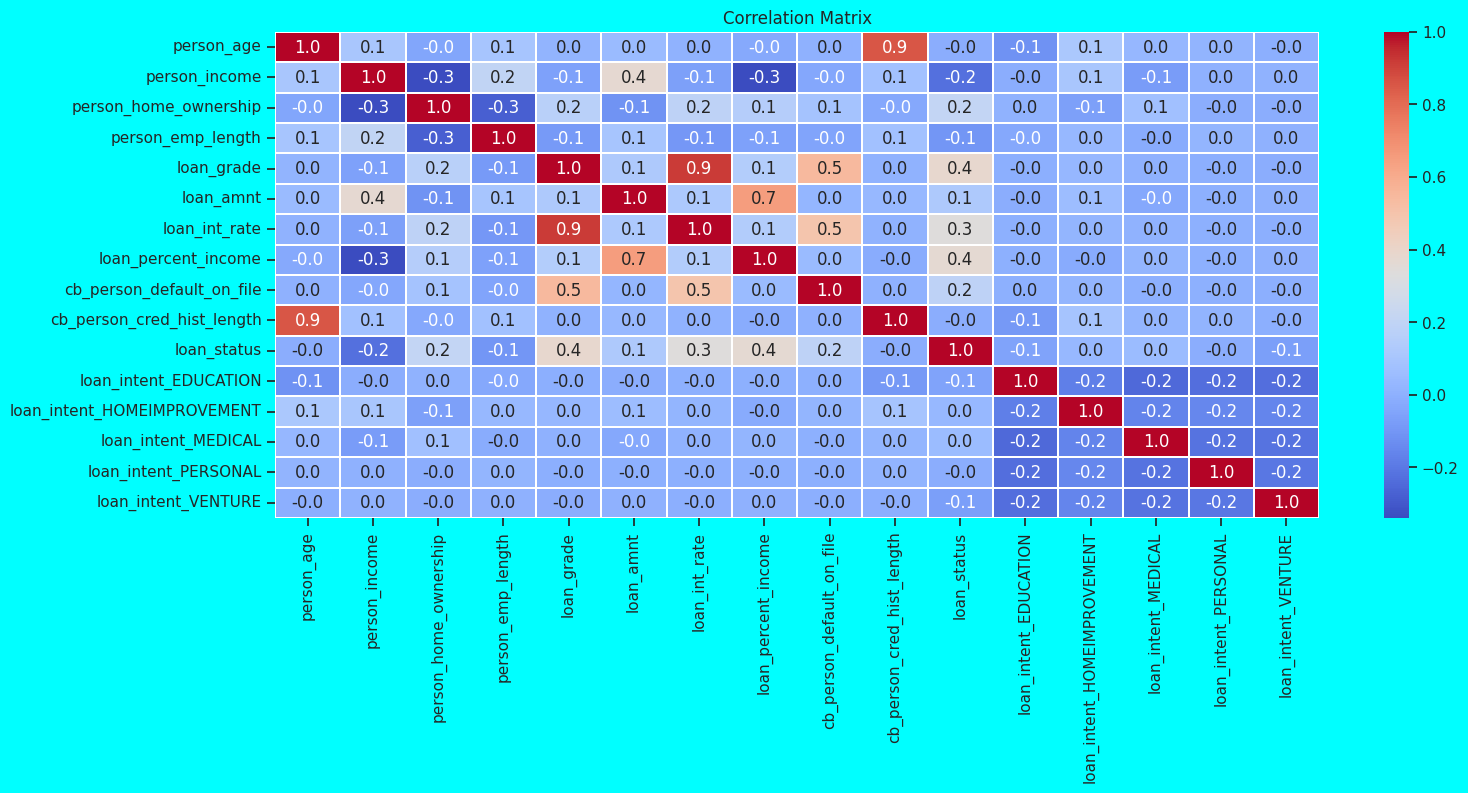

In [ ]:
def corr_heatmap(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(15, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
    plt.gcf().set_facecolor('#00FFFF')
    plt.title('Correlation Matrix')
    plt.show()

corr_heatmap(tando_encoded)

- **loan_grade** and **loan_int_rate** are highly correlated - **0.9**
- **person_age** and **cb_person_cred_hist_length** are highly correlated - **0.9**

Dropping one of each of these pairs should be a good idea.  
**But** after checking **feature importances** with  **RandomForestClassifier**, loan_grade's importance didn't quite go to loan_int_rate.   
So I decided to **keep** loan_grade.

In [ ]:
train_encoded.drop(columns=['cb_person_cred_hist_length'], inplace=True)
test_encoded_1.drop(columns=['cb_person_cred_hist_length'], inplace=True)
tando_encoded.drop(columns=['cb_person_cred_hist_length'], inplace=True)
test_encoded_2.drop(columns=['cb_person_cred_hist_length'], inplace=True)

numerical_columns.remove('cb_person_cred_hist_length')

# Feature Engineering

Since Feature Engineering I'm gonna use only one training data: either train_encoded or tando_encoded

## Train-test split

In [ ]:
y_train = train_encoded['loan_status']
X_train = train_encoded.drop(['loan_status'], axis=1)
X_test = test_encoded_1

## Feature Creation
- Creating new features like **ratios**, **differences**, or **aggregates**.
- **Domain-specific** features (e.g., extracting weekday, month, or season from a date feature).

In [ ]:
def feature_engineering(df, median_income):
    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate']
    #df['income_per_year_emp'] = df['person_income'] / (df['person_emp_length'] + 1)
    #df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
    #df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']
    #df['is_home_owner'] = df['person_home_ownership'].apply(lambda x: 1 if x == 'OWN' else 0)
    df['loan_int_emp_interaction'] = df['loan_int_rate'] * df['person_emp_length']
    #df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})
    #df['income_stability_index'] = (df['person_income'] / df['person_emp_length']) / df['person_income'].mean()
    #df['loan_grade_int_interaction'] = df['loan_grade'].astype('category').cat.codes * df['loan_int_rate']
    #df['debt_to_credit_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length']
    #df['loan_affordability'] = df['loan_amnt'] / (df['person_income'] / 12)
    #df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length']
    #df['int_per_year_emp'] = df['loan_int_rate'] / (df['person_emp_length'] + 1)
    #df['loan_amt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length'] + 1)
    #df['is_young_borrower'] = df['person_age'].apply(lambda x: 1 if x < 30 else 0)
    #df['is_high_income'] = df['person_income'].apply(lambda x: 1 if x > median_income else 0)
    return df

median_income = X_train['person_income'].median()
X_train = feature_engineering(X_train, median_income)
X_test = feature_engineering(X_test, median_income)

## Feature Transformation
- Encoding categorical variables (e.g., **one-hot encoding**).
- Log transformations to handle **skewed distributions**.
- Polynomial features for **non-linear relationships**.

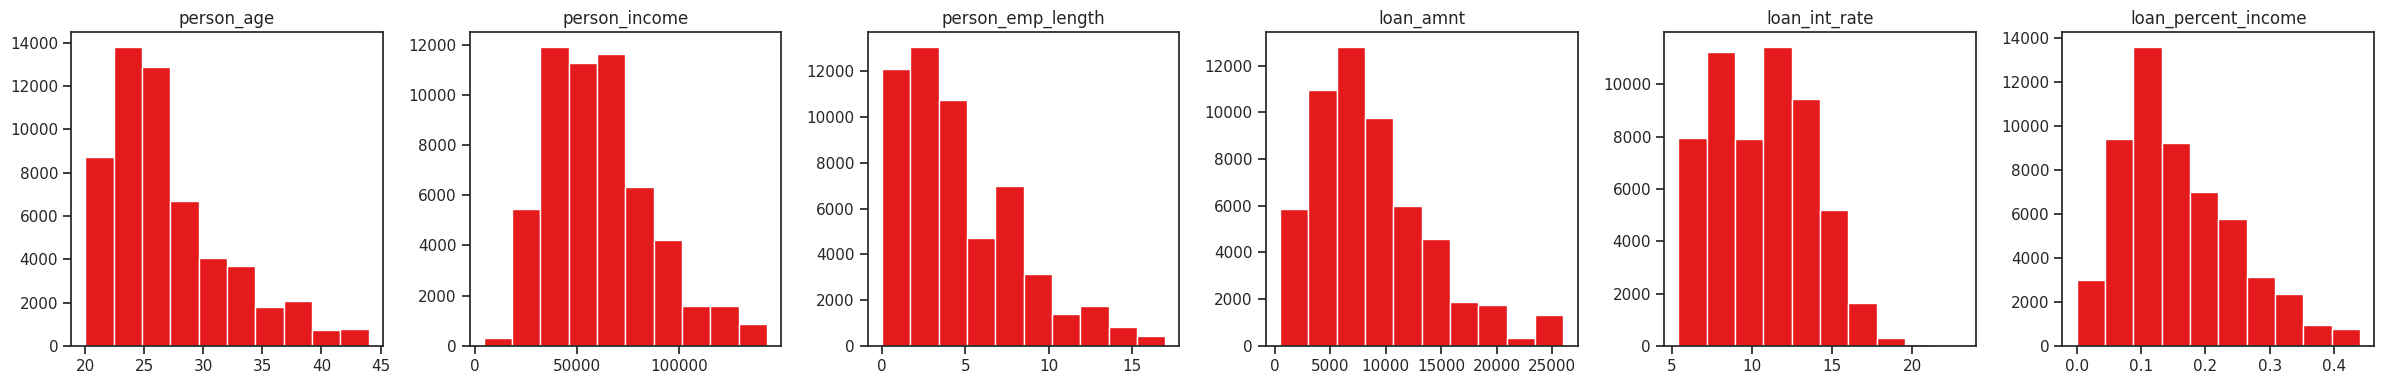

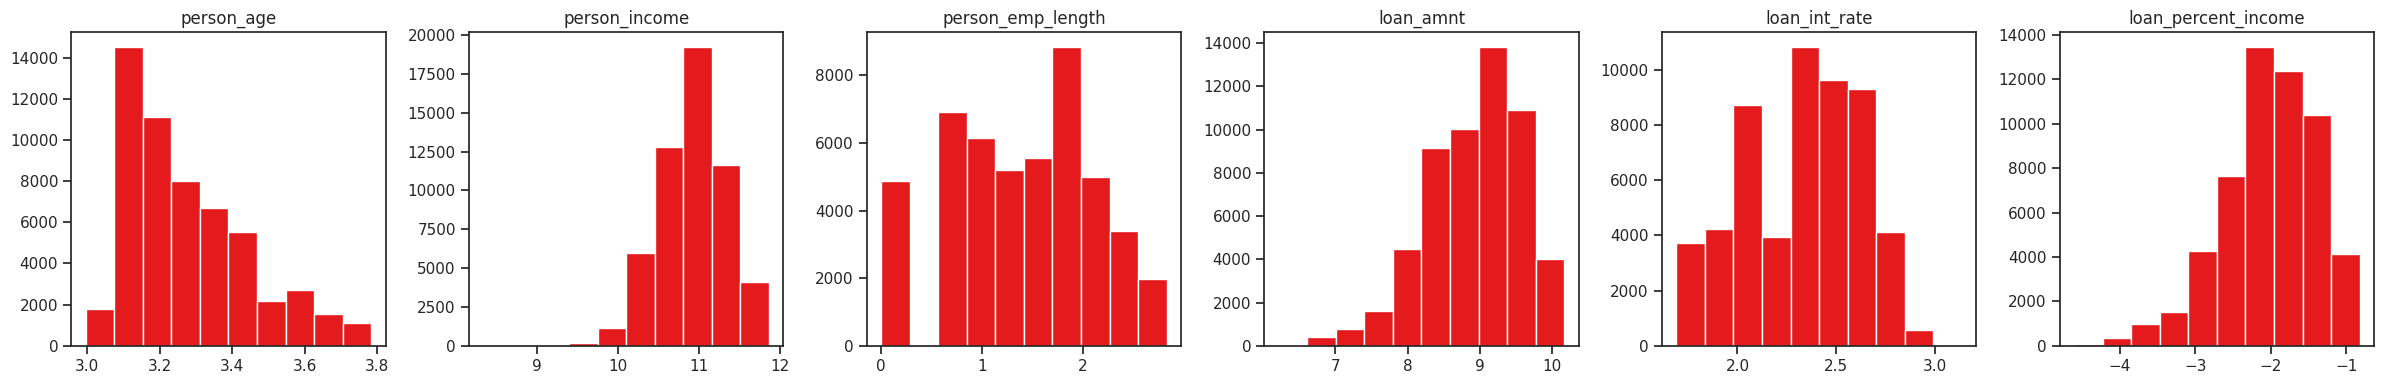

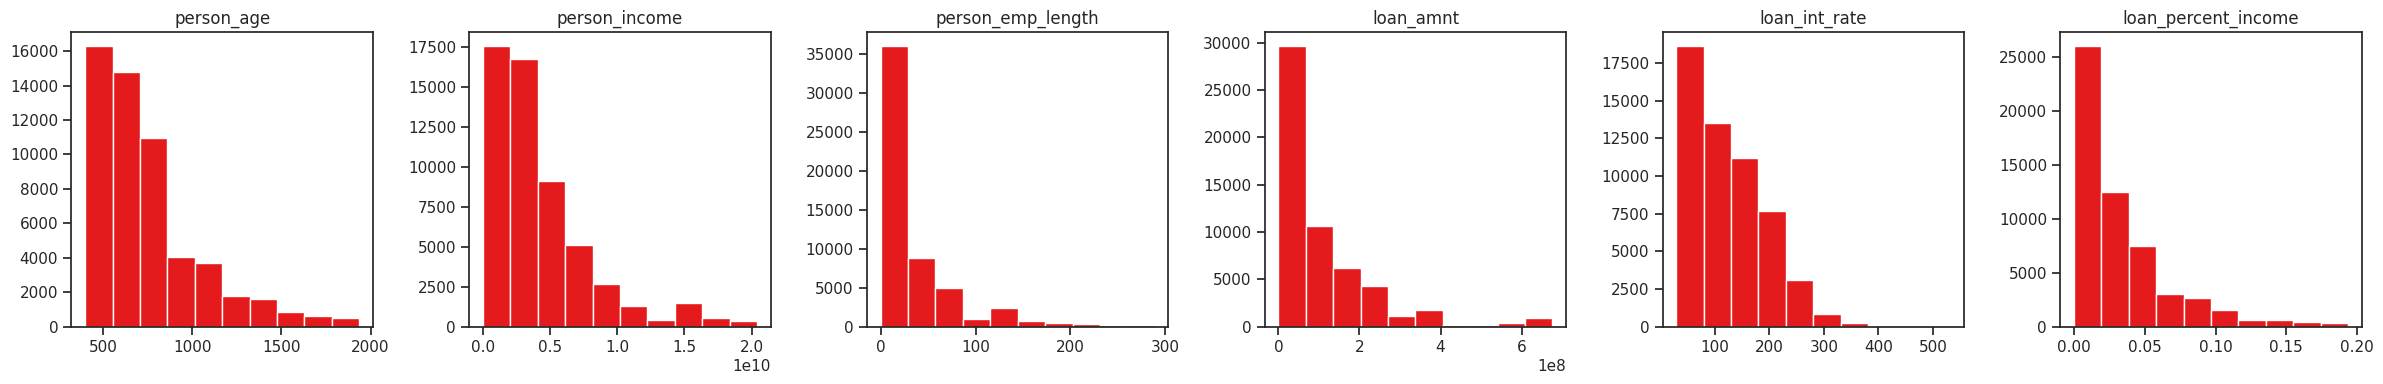

In [ ]:
# original distributions
n = len(numerical_columns)
fig, axes = plt.subplots(1, n, figsize=(n*4, 4))
for i, col in enumerate(numerical_columns):
    axes[i].hist(X_train[col])
    axes[i].set_title(col)
plt.tight_layout()

# log distributions
fig, axes = plt.subplots(1, n, figsize=(n*4, 4))
for i, col in enumerate(numerical_columns):
    axes[i].hist(np.log(X_train[col][X_train[col] > 0]))
    axes[i].set_title(col)
plt.tight_layout()

# squared distributions
fig, axes = plt.subplots(1, n, figsize=(n*4, 4))
for i, col in enumerate(numerical_columns):
    axes[i].hist(X_train[col]**2)
    axes[i].set_title(col)
plt.tight_layout()

In [ ]:
X_train['log_person_age'] = np.log(X_train['person_age'])
X_train['2_loan_int_rate'] = X_train['loan_int_rate']**2

X_test['log_person_age'] = np.log(X_test['person_age'])
X_test['2_loan_int_rate'] = X_test['loan_int_rate']**2

X_train.shape, X_train.columns.to_list()

((55153, 18),
 ['person_age',
  'person_income',
  'person_home_ownership',
  'person_emp_length',
  'loan_grade',
  'loan_amnt',
  'loan_int_rate',
  'loan_percent_income',
  'cb_person_default_on_file',
  'loan_intent_EDUCATION',
  'loan_intent_HOMEIMPROVEMENT',
  'loan_intent_MEDICAL',
  'loan_intent_PERSONAL',
  'loan_intent_VENTURE',
  'financial_burden',
  'loan_int_emp_interaction',
  'log_person_age',
  '2_loan_int_rate'])

## Feature Selection before Scaling

Feature selection is **flexible**, and there are **many ways** to select features.  
**The order** of feature selection should be chosen according to **the actual situation**.  
- Some feature selection techniques (like **variance threshold**) depend on the original distribution of the data. Scaling can change the **variance** and relationships between features, potentially distorting these techniques.
- Algorithms like **Lasso (L1)** or **Ridge (L2)** regression involve **regularization**, which is sensitive to the scale of the data. In these cases, you would need to **scale the features first** and then apply the model-based feature selection technique.
- Tree-based models aren't sensitive to the scale of features and **can handle** unscaled data. In this case, scaling may be **optional**, but you can still perform feature selection before or after.

**Filter Methods:**  Filter methods rely on the **general characteristics of the data** to select features, **independently** of any specific machine learning model.

- Correlation Coefficient
    - Measures the **statistical relationship** between each **feature** and the **target** variable.
- Variance Threshold      
    - Removes all features with **low variance**, assuming that features with very low variance do not contain **useful information**.

**Wrapper Methods:**  Wrapper methods **evaluate** multiple models by using a **subset of features** and selecting the one that gives the best performance.

- Recursive Feature Elimination (RFE)
    - Starts with **all** features, trains a model, **ranks features** by importance, and **recursively eliminates** the least important features.
- Sequential Feature Selection (SFS)
    - **Forward Selection**: Start with no features and add one at a time.
    - **Backward Selection**: Start with all features and remove one at a time.

**Embedded Methods:**
Embedded methods **select** features **during the model training process** itself.
- Lasso Regression (L1 Regularization)
  - **Adds a penalty** to the model for large coefficients, shrinking less important **features to zero**.
  - Often used in **linear models** to perform feature selection.
- Ridge Regression (L2 Regularization)  
    - Ridge also adds a **penalty**, but it **shrinks** the coefficients **proportionally** without eliminating them.
- Tree-Based Models (Random Forest, Gradient Boosting)
    - Algorithms like **Random Forests** or **Gradient Boosting** can rank features based on how important they are for making predictions.
    - Tree-based methods **automatically** perform feature selection **by giving more weight** to important features.


**Dimensionality Reduction:**

- Principal Component Analysis (PCA)
    - **Reduces** the number of features by finding **new feature axes** (principal components) that explain the **maximum variance** in the data.
- Linear Discriminant Analysis (LDA)
    - A **supervised** dimensionality reduction **technique** that finds a **linear combination** of features that best **separate** two or more classes.

### Filter Methods

#### Correlation Coefficient

In [ ]:
df = X_train.copy()
df['loan_status'] = y_train

corr_matrix = df.corr()
l = abs(corr_matrix["loan_status"]) >= 0.05
print(df.columns[l == 0])

Index(['person_age', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_int_emp_interaction', 'log_person_age'],
      dtype='object')


In [ ]:
columns_to_remove = ['person_age', 'loan_int_emp_interaction', 'log_person_age']

# X_train.drop(columns=columns_to_remove, inplace=True)
# X_test.drop(columns=columns_to_remove, inplace=True)

#### Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1) # features with variance less than 0.1 will be removed

# X_train = selector.fit_transform(X_train)
# X_test = X_test.loc[:, X_train.columns.to_list()]
# X_train.shape

## Feature Scaling

- **Normalization** (e.g., **Min-Max Scaling** - scaling values between 0 and 1).
- **Standardization** (e.g., z-score scaling where features have mean = 0 and standard deviation = 1).
- **Robust Scaling** (uses the **median** and the **interquartile range (IQR)** instead of mean and standard deviation)

Key Notes:
* Always **fit** the scaler on the **training set** and then **transform** both the training and test sets.  
  This ensures that the test data is transformed using the scaling parameters derived from the training data, avoiding data leakage.

* **StandardScaler** is ideal when the data follows a **normal distribution**, while **MinMaxScaler** works well when the features are **not normally distributed** but need to be within a bounded range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = StandardScaler() # scaler = MinMaxScaler(), scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = y_train.to_numpy()

## Feature Selection after Scaling

### Wrapper Methods

#### Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

rfe = RFE(estimator=model, n_features_to_select=0.9)
rfe.fit(X_train_scaled, y_train)

selected_features = rfe.get_support(indices=True)
print(f"Selected features: {selected_features}")

# X_train_scaled = X_train_scaled[:, selected_features]
# X_test_scaled = X_test_scaled[:, selected_features]

print(rfe.support_)  # Boolean array indicating selected features
print(rfe.ranking_)  # Feature rankings

Selected features: [ 0  1  2  3  4  5  6  7  9 10 11 12 14 15 16 17]
[ True  True  True  True  True  True  True  True False  True  True  True
  True False  True  True  True  True]
[1 1 1 1 1 1 1 1 3 1 1 1 1 2 1 1 1 1]


#### Sequential Feature Selection (SFS)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Perform forward sequential feature selection
sfs = SequentialFeatureSelector(model, n_features_to_select=0.9, direction='forward')
sfs.fit(X_train_scaled, y_train)

selected_features = sfs.get_support(indices=True)
print(f"Selected features: {selected_features}")

# X_train_scaled = X_train_scaled[:, selected_features]
# X_test_scaled = X_test_scaled[:, selected_features]

Selected features: [ 0  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17]


### Embedded Methods

#### Lasso Regression (L1 Regularization)

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01)  # You can adjust alpha to control regularization strength
model.fit(X_train_scaled, y_train)

print(model.coef_.round(4))
# Select non-zero coefficient features
# X_train_scaled = X_train_scaled[:, model.coef_ != 0]
# X_test_scaled = X_test_scaled[:, model.coef_ != 0]

[ 0.000e+00 -1.400e-03  2.060e-02 -0.000e+00  1.099e-01 -2.510e-02
  0.000e+00  1.111e-01  0.000e+00 -1.100e-02  1.000e-04  0.000e+00
 -0.000e+00 -1.360e-02 -0.000e+00 -8.800e-03  0.000e+00  0.000e+00]


#### Ridge Regression (L2 Regularization)

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.01)
model.fit(X_train_scaled, y_train)

# Check coefficients to assess feature importance
print(model.coef_.round(4))

[ 0.0173  0.0445  0.0314  0.0634  0.1216 -0.0952 -0.3085  0.1864 -0.0136
 -0.0331 -0.002  -0.0111 -0.0203 -0.0356 -0.0078 -0.0774 -0.0184  0.3338]


#### Tree-Based Methods (Feature Importance)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

loan_percent_income            0.205625
loan_grade                     0.111961
person_income                  0.098851
loan_int_rate                  0.085148
person_home_ownership          0.082192
2_loan_int_rate                0.074028
financial_burden               0.061197
loan_int_emp_interaction       0.055980
loan_amnt                      0.047023
person_emp_length              0.034467
person_age                     0.031448
log_person_age                 0.031033
loan_intent_MEDICAL            0.017236
loan_intent_HOMEIMPROVEMENT    0.016659
loan_intent_EDUCATION          0.013424
loan_intent_PERSONAL           0.012470
loan_intent_VENTURE            0.012013
cb_person_default_on_file      0.009244
dtype: float64


### Dimensionality Reduction

#### Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train_scaled)
print(pca.explained_variance_ratio_)  # Shows the variance explained by each component

[0.2167923  0.14060084 0.11399905 0.10372163 0.07296659]


#### Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train_scaled, y_train)
X_lda.shape

(55153, 1)

# Class Balancing

In [ ]:
X_train_scaled.shape, np.unique(y_train, return_counts=True)

((55153, 18), (array([0, 1], dtype=int8), array([47442,  7711])))

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

sm = SMOTE(sampling_strategy=1, random_state=42, k_neighbors=3)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_scaled, y_train)

X_train_balanced.shape, np.unique(y_train_balanced, return_counts=True)

((94884, 18), (array([0, 1], dtype=int8), array([47442, 47442])))

# Model Selection

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score as accuracy#,  confusion_matrix, \
#  matthews_corrcoef as mcc, f1_score, average_precision_score as ap, PrecisionRecallDisplay as prd

data = pd.DataFrame(columns=['roc_auc_score_train', 'roc_auc_score_test', 'accuracy_train'])
data.loc['Min', 'accuracy_train'] = 1-y_train.mean()

## GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB().fit(X_train_scaled, y_train)
y_probs = clf_nb.predict_proba(X_train_scaled)[:, 1]
y_pred = y_probs >= 0.5

data.loc[f'GaussianNB', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train, y_probs), accuracy(y_train, y_pred)]
data

# Training on balanced
clf_nb_b = GaussianNB().fit(X_train_balanced, y_train_balanced)
y_probs = clf_nb_b.predict_proba(X_train_balanced)[:, 1]
y_pred = y_probs >= 0.5

data.loc[f'GaussianNB_balanced', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train_balanced, y_probs), accuracy(y_train_balanced, y_pred)]
data

,roc_auc_score_train,roc_auc_score_test,accuracy_train
Min,NaN,NaN,0.860189
GaussianNB,0.8677,NaN,0.836274
GaussianNB_balanced,0.871425,NaN,0.790607


##  Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=param_grid, verbose=1, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

clf_log = grid.best_estimator_
y_probs = clf_log.predict_proba(X_train_scaled)[:, 1]
y_pred = y_probs >= 0.5

data.loc['Log_Reg', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train, y_probs), accuracy(y_train, y_pred)]
data

# Training on balanced
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=param_grid, verbose=1, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_balanced, y_train_balanced)

clf_log_b = grid.best_estimator_
y_probs = clf_log_b.predict_proba(X_train_balanced)[:, 1]
y_pred = y_probs >= 0.5

data.loc['Log_Reg_balanced', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train_balanced, y_probs), accuracy(y_train_balanced, y_pred)]
data

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


,roc_auc_score_train,roc_auc_score_test,accuracy_train
Min,NaN,NaN,0.860189
GaussianNB,0.8677,NaN,0.836274
GaussianNB_balanced,0.871425,NaN,0.790607
Log_Reg,0.888346,NaN,0.902743
Log_Reg_balanced,0.894688,NaN,0.823448


## KNN

### Choosing k with **elbow method**

Fitting 5 folds for each of 9 candidates, totalling 45 fits


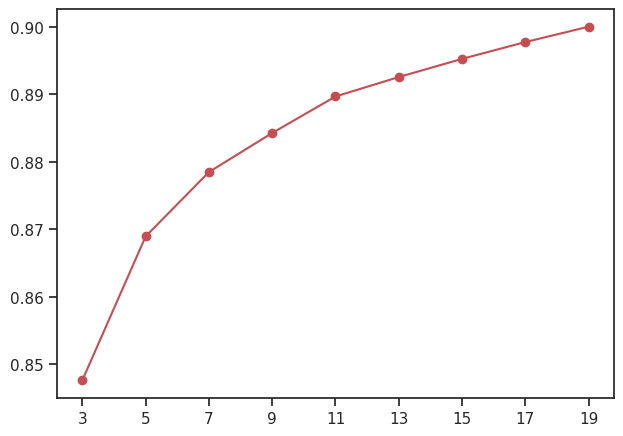

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# (X_train_scaled, y_train), (X_train_balanced, y_train_balanced)
grid = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': range(3, 20, 2)}, verbose=1, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

plt.plot(grid.cv_results_['param_n_neighbors'], grid.cv_results_['mean_test_score'], 'o-r')
plt.xticks(range(3, 20, 2))
plt.show()

### Fitting


In [ ]:
for k in [11, 19]:
    clf_knn = KNeighborsClassifier(k).fit(X_train_scaled, y_train)
    y_probs = clf_knn.predict_proba(X_train_scaled)[:, 1]
    y_pred = y_probs > 0.5

    data.loc[f'KNN_{k}', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train, y_probs), accuracy(y_train, y_pred)]

    # Training on balanced
    clf_knn = KNeighborsClassifier(k).fit(X_train_balanced, y_train_balanced)
    y_probs = clf_knn.predict_proba(X_train_balanced)[:, 1]
    y_pred = y_probs > 0.5

    data.loc[f'KNN_{k}_balanced', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train_balanced, y_probs), accuracy(y_train_balanced, y_pred)]
data

,roc_auc_score_train,roc_auc_score_test,accuracy_train
Min,NaN,NaN,0.860189
GaussianNB,0.8677,NaN,0.836274
GaussianNB_balanced,0.871425,NaN,0.790607
Log_Reg,0.888346,NaN,0.902743
Log_Reg_balanced,0.894688,NaN,0.823448
KNN_11,0.956966,NaN,0.935108
KNN_11_balanced,0.986928,NaN,0.921072
KNN_19,0.946404,NaN,0.930339
KNN_19_balanced,0.97646,NaN,0.904389


## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

grid = GridSearchCV(LDA(), param_grid={'solver': ['svd', 'lsqr', 'eigen']}, verbose=1, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

clf_lda = grid.best_estimator_
y_probs = clf_lda.predict_proba(X_train_scaled)[:, 1]
y_pred = y_probs >= 0.5

data.loc['LDA', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train, y_probs), accuracy(y_train, y_pred)]

# Training on balanced
grid = GridSearchCV(LDA(), param_grid={'solver': ['svd', 'lsqr', 'eigen']}, verbose=1, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_balanced, y_train_balanced)

clf_lda = grid.best_estimator_
y_probs = clf_lda.predict_proba(X_train_balanced)[:, 1]
y_pred = y_probs >= 0.5

data.loc['LDA_balanced', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train_balanced, y_probs), accuracy(y_train_balanced, y_pred)]
data

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


,roc_auc_score_train,roc_auc_score_test,accuracy_train
Min,NaN,NaN,0.860189
GaussianNB,0.8677,NaN,0.836274
GaussianNB_balanced,0.871425,NaN,0.790607
Log_Reg,0.888346,NaN,0.902743
Log_Reg_balanced,0.894688,NaN,0.823448
KNN_11,0.956966,NaN,0.935108
KNN_11_balanced,0.986928,NaN,0.921072
KNN_19,0.946404,NaN,0.930339
KNN_19_balanced,0.97646,NaN,0.904389
LDA,0.879627,NaN,0.898301


## QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

grid = GridSearchCV(QDA(), param_grid={'reg_param': np.arange(0.13, 0.19, 0.01)}, verbose=1, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

clf_qda = grid.best_estimator_
y_probs = clf_qda.predict_proba(X_train_scaled)[:, 1]
y_pred = y_probs >= 0.5

data.loc['QDA', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train, y_probs), accuracy(y_train, y_pred)]

# Training on balanced
grid = GridSearchCV(QDA(), param_grid={'reg_param': np.arange(0.13, 0.19, 0.01)}, verbose=1, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_balanced, y_train_balanced)

clf_qda = grid.best_estimator_
y_probs = clf_qda.predict_proba(X_train_balanced)[:, 1]
y_pred = y_probs >= 0.5

data.loc['QDA_balanced', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train_balanced, y_probs), accuracy(y_train_balanced, y_pred)]
data

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


,roc_auc_score_train,roc_auc_score_test,accuracy_train
Min,NaN,NaN,0.860189
GaussianNB,0.8677,NaN,0.836274
GaussianNB_balanced,0.871425,NaN,0.790607
Log_Reg,0.888346,NaN,0.902743
Log_Reg_balanced,0.894688,NaN,0.823448
KNN_11,0.956966,NaN,0.935108
KNN_11_balanced,0.986928,NaN,0.921072
KNN_19,0.946404,NaN,0.930339
KNN_19_balanced,0.97646,NaN,0.904389
LDA,0.879627,NaN,0.898301


## Support Vector Machines (SVM)

In [ ]:
# from sklearn.svm import SVC, LinearSVC

# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
#     'gamma': ['scale', 'auto']  # Kernel coefficient
# }

# grid = GridSearchCV(SVC(), param_grid=param_grid, verbose=1, scoring='roc_auc', n_jobs=-1)
# grid.fit(X_train_scaled, y_train)

# clf_svc = grid.best_estimator_
# y_probs = clf_svc.predict_proba(X_train_scaled)
# y_pred = y_probs >= 0.5

# data.loc['SVC', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train, y_probs), accuracy(y_train, y_pred)]

# # Training on balanced
# grid = GridSearchCV(SVC(), param_grid=param_grid, verbose=1, scoring='roc_auc', n_jobs=-1)
# grid.fit(X_train_balanced, y_train)

# clf_svc_b = grid.best_estimator_
# y_probs = clf_svc_b.predict_proba(X_train_balanced)
# y_pred = y_probs >= 0.5

# data.loc['SVC_balanced', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train_balanced, y_probs), accuracy(y_train_balanced, y_pred)]
# data

##  Decision_tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

grid = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': range(3, 20)}, verbose=1, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

clf_dt = grid.best_estimator_
y_probs=clf_dt.predict_proba(X_train_scaled)[:,1]
y_pred = y_probs >= 0.5

data.loc['DecisionTree', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train, y_probs), accuracy(y_train, y_pred)]

# Training on balanced
grid = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': range(3, 20)}, verbose=1, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_balanced, y_train_balanced)

clf_dt_b = grid.best_estimator_
y_probs=clf_dt_b.predict_proba(X_train_balanced)[:,1]
y_pred = y_probs >= 0.5

data.loc['DecisionTree_balanced', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train_balanced, y_probs), accuracy(y_train_balanced, y_pred)]
data

Fitting 5 folds for each of 17 candidates, totalling 85 fits
Fitting 5 folds for each of 17 candidates, totalling 85 fits


,roc_auc_score_train,roc_auc_score_test,accuracy_train
Min,NaN,NaN,0.860189
GaussianNB,0.8677,NaN,0.836274
GaussianNB_balanced,0.871425,NaN,0.790607
Log_Reg,0.888346,NaN,0.902743
Log_Reg_balanced,0.894688,NaN,0.823448
KNN_11,0.956966,NaN,0.935108
KNN_11_balanced,0.986928,NaN,0.921072
KNN_19,0.946404,NaN,0.930339
KNN_19_balanced,0.97646,NaN,0.904389
LDA,0.879627,NaN,0.898301


## Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid.fit(X_train_scaled, y_train)

# clf_rf = grid.best_estimator_
# y_probs = clf_rf.predict_proba(X_train_scaled)[:,1]
# y_pred = y_probs >= 0.5

# data.loc['RandomForest', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train, y_probs), accuracy(y_train, y_pred)]

# # Training on balanced
# grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid.fit(X_train_balanced, y_train_balanced)

# clf_rf_b = grid.best_estimator_
# y_probs = clf_rf_b.predict_proba(X_train_balanced)[:,1]
# y_pred = y_probs >= 0.5

# data.loc['RandomForest_balanced', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train_balanced, y_probs), accuracy(y_train_balanced, y_pred)]
# data

## LGBM

In [ ]:
# !pip install lightgbm
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier

lgb_params = {
    'objective': 'binary',
    'n_estimators': 3000,
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'learning_rate': 0.0322942967545754,
    'num_leaves': 24,
    'max_depth': 15,
    'min_data_in_leaf': 25,
    'feature_fraction': 0.6236144085285287,
    'bagging_fraction': 0.9596685778433888,
    'bagging_freq': 3,
    'verbose': -1
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
lgbm_probs = np.zeros(len(X_train_scaled))
lgbm_true_labels = np.zeros(len(X_train_scaled))
lgbm_test_probs = np.zeros(len(X_test_scaled))

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train)):
    X_t, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_t, y_val = y_train[train_idx], y_train[val_idx]

    lgbm_model = LGBMClassifier(**lgb_params)
    lgbm_model.fit(X_t, y_t,
                   eval_set=[(X_val, y_val)],
                   eval_metric='auc')

    lgbm_fold_preds = lgbm_model.predict_proba(X_val)[:, 1]
    lgbm_fold_test_preds = lgbm_model.predict_proba(X_test_scaled)[:, 1]
    lgbm_probs[val_idx] = lgbm_fold_preds
    lgbm_true_labels[val_idx] = y_val
    lgbm_test_probs += lgbm_fold_test_preds / n_splits

overall_metric_lgbm = roc_auc_score(lgbm_true_labels, lgbm_probs)
print("Overall AUC (LGBMClassifier with StratifiedKFold):", overall_metric_lgbm)

data.loc['LGBM', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(lgbm_true_labels, lgbm_probs), accuracy(lgbm_true_labels, lgbm_probs>=0.5)]
data

Overall AUC (LGBMClassifier with StratifiedKFold): 0.9551771714442181


,roc_auc_score_train,roc_auc_score_test,accuracy_train
Min,NaN,NaN,0.860189
GaussianNB,0.8677,NaN,0.836274
GaussianNB_balanced,0.871425,NaN,0.790607
Log_Reg,0.888346,NaN,0.902743
Log_Reg_balanced,0.894688,NaN,0.823448
KNN_11,0.956966,NaN,0.935108
KNN_11_balanced,0.986928,NaN,0.921072
KNN_19,0.946404,NaN,0.930339
KNN_19_balanced,0.97646,NaN,0.904389
LDA,0.879627,NaN,0.898301


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

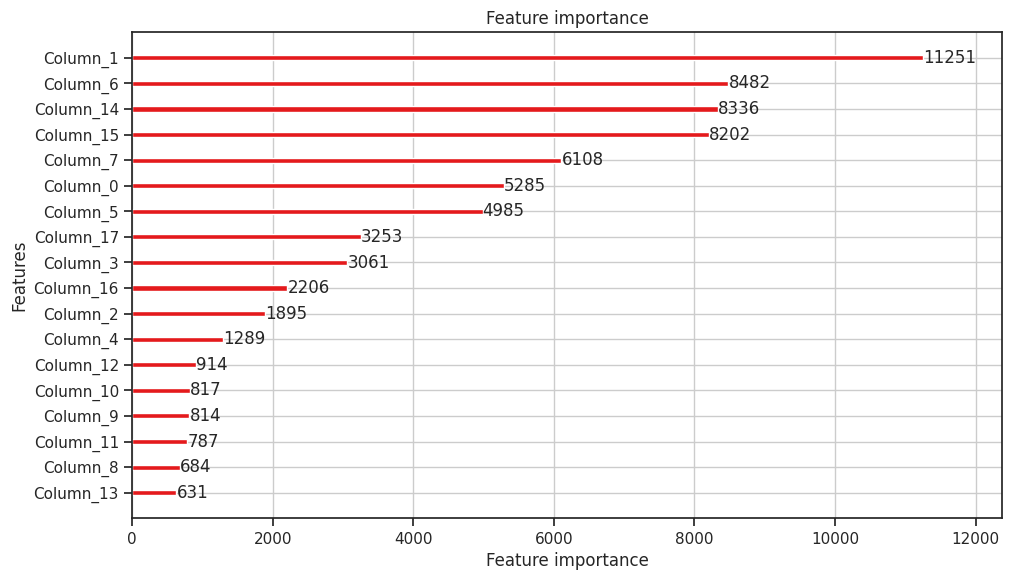

In [ ]:
from lightgbm import plot_importance
plot_importance(lgbm_model,figsize=(10, 6))

##  CatBoost

In [ ]:
# !pip install catboost
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

catboost_params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'learning_rate': 0.05,
    'iterations': 600,
    'depth': 9,
    'random_strength': 0,
    'l2_leaf_reg': 0.5,
    'random_seed': 42,
    'verbose': True
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

catboost_probs = np.zeros(len(X_train_scaled))
catboost_true_labels = np.zeros(len(X_train_scaled))
catboost_test_probs = np.zeros(len(X_test_scaled))

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train)):
    X_t, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_t, y_val = y_train[train_idx], y_train[val_idx]
    catboost_model = CatBoostClassifier(**catboost_params)
    catboost_model.fit(X_t, y_t,
                       eval_set=(X_val, y_val),
                       early_stopping_rounds=10,
                       verbose=False)

    catboost_fold_preds = catboost_model.predict_proba(X_val)[:, 1]
    catboost_fold_test_preds = catboost_model.predict_proba(X_test_scaled)[:, 1]
    catboost_probs[val_idx] = catboost_fold_preds
    catboost_true_labels[val_idx] = y_val
    catboost_test_probs += catboost_fold_test_preds / n_splits

overall_metric_catboost = roc_auc_score(catboost_true_labels, catboost_probs)
print("Overall AUC (CatBoostClassifier with StratifiedKFold):", overall_metric_catboost)
data.loc['CatBoost', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(catboost_true_labels, catboost_probs), accuracy(catboost_true_labels, catboost_probs>=0.5)]
data

Overall AUC (CatBoostClassifier with StratifiedKFold): 0.9482415760560571


,roc_auc_score_train,roc_auc_score_test,accuracy_train
Min,NaN,NaN,0.860189
GaussianNB,0.8677,NaN,0.836274
GaussianNB_balanced,0.871425,NaN,0.790607
Log_Reg,0.888346,NaN,0.902743
Log_Reg_balanced,0.894688,NaN,0.823448
KNN_11,0.956966,NaN,0.935108
KNN_11_balanced,0.986928,NaN,0.921072
KNN_19,0.946404,NaN,0.930339
KNN_19_balanced,0.97646,NaN,0.904389
LDA,0.879627,NaN,0.898301


## DNN(Dense Neural Network)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
clf_dnn = Sequential()
clf_dnn.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
clf_dnn.add(Dropout(0.2))
clf_dnn.add(Dense(64, activation='relu'))
clf_dnn.add(Dropout(0.2))
clf_dnn.add(Dense(1, activation='sigmoid'))

clf_dnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
clf_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = clf_dnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1379/1379 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8915 - loss: 0.2831 - val_accuracy: 0.9292 - val_loss: 0.2092
Epoch 2/10
1379/1379 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9241 - loss: 0.2199 - val_accuracy: 0.9362 - val_loss: 0.2006
Epoch 3/10
1379/1379 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9296 - loss: 0.2107 - val_accuracy: 0.9385 - val_loss: 0.1918
Epoch 4/10
1379/1379 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9364 - loss: 0.1990 - val_accuracy: 0.9407 - val_loss: 0.1890
Epoch 5/10
1379/1379 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9373 - loss: 0.1962 - val_accuracy: 0.9414 - val_loss: 0.1863
Epoch 6/10
1379/1379 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9377 - loss: 0.1980 - val_accuracy: 0.9431 - val_loss: 0.1832
Epoch 7/10
1379/1379 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9376 - loss: 0.2000 - val_accuracy: 0.9445 - val_loss: 0.1833
Epoch 8/10
1379/1379 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9400 - loss: 0.1954

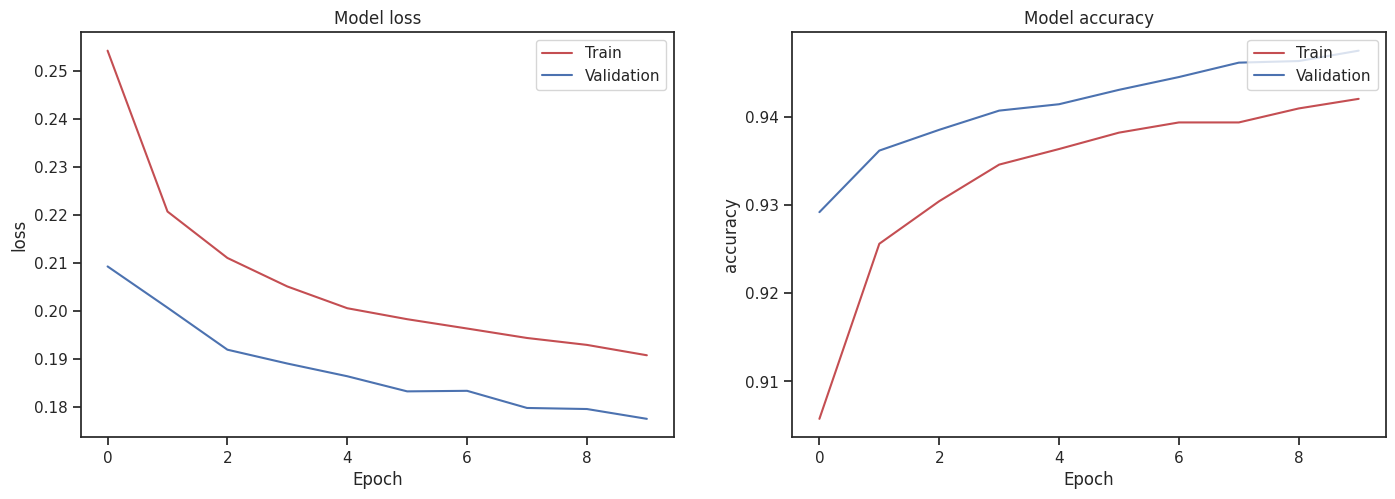

Epoch 1/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9444 - loss: 0.1829
Epoch 2/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9438 - loss: 0.1855
Epoch 3/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9428 - loss: 0.1858
Epoch 4/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9437 - loss: 0.1856
Epoch 5/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9443 - loss: 0.1858
Epoch 6/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9442 - loss: 0.1839
Epoch 7/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9457 - loss: 0.1835
Epoch 8/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9454 - loss: 0.1789
Epoch 9/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9447 - loss: 0.1830
Epoch 10/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9445 - loss: 0.1827


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, metric in enumerate(['loss', 'accuracy']):
    ax[i].plot(history.history[metric], 'r')
    ax[i].plot(history.history[f'val_{metric}'], 'b')
    ax[i].set_title(f'Model {metric}')
    ax[i].set_ylabel(metric)
    ax[i].set_xlabel('Epoch')
    ax[i].legend(['Train', 'Validation'], loc='upper right')
plt.show()

best_epoch = np.argmin(history.history['val_loss']) + 1
history_final = clf_dnn.fit(X_train_scaled, y_train, epochs=best_epoch, batch_size=32)

In [ ]:
y_probs = clf_dnn.predict(X_train_scaled)
y_pred = y_probs >= 0.5

data.loc['DNN', ['roc_auc_score_train', 'accuracy_train']] = [roc_auc_score(y_train, y_probs), accuracy(y_train, y_pred)]
data.to_csv('data.csv')
data

1724/1724 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


,roc_auc_score_train,roc_auc_score_test,accuracy_train
Min,NaN,NaN,0.860189
GaussianNB,0.8677,NaN,0.836274
GaussianNB_balanced,0.871425,NaN,0.790607
Log_Reg,0.888346,NaN,0.902743
Log_Reg_balanced,0.894688,NaN,0.823448
KNN_11,0.956966,NaN,0.935108
KNN_11_balanced,0.986928,NaN,0.921072
KNN_19,0.946404,NaN,0.930339
KNN_19_balanced,0.97646,NaN,0.904389
LDA,0.879627,NaN,0.898301


# Final submission

In [154]:
final_model = clf_dnn
sub = pd.read_csv('sample_submission.csv')
sub.loan_status = final_model.predict(X_test_scaled)
sub.head()

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


,id,loan_status
0,58645,0.900722
1,58646,0.025235
2,58647,0.218430
3,58648,0.036047
4,58649,0.116432


In [155]:
sub.to_csv('submission.csv', index=False)

# Collecting submission results

In [158]:
import pandas as pd

data = pd.read_csv('data.csv')
data.loc['KNN_11', 'roc_auc_score_test'] = 0.89245
data.loc['KNN_19', 'roc_auc_score_test'] = 0.90766
data.loc['KNN_19_balanced', 'roc_auc_score_test'] = 0.90132
data.loc['DecisionTree', 'roc_auc_score_test'] = 0.90023
data.loc['DNN', 'roc_auc_score_test'] = 0.93102
data.to_csv('data.csv')
data


,roc_auc_score_train,roc_auc_score_test,accuracy_train
Min,NaN,NaN,0.860189
GaussianNB,0.8677,NaN,0.836274
GaussianNB_balanced,0.871425,NaN,0.790607
Log_Reg,0.888346,NaN,0.902743
Log_Reg_balanced,0.894688,NaN,0.823448
KNN_11,0.956966,0.89245,0.935108
KNN_11_balanced,0.986928,NaN,0.921072
KNN_19,0.946404,0.90766,0.930339
KNN_19_balanced,0.97646,0.90132,0.904389
LDA,0.879627,NaN,0.898301
